# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Reading Data

In [2]:
df=pd.read_csv("http://bit.ly/w-data")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Graphical analysis


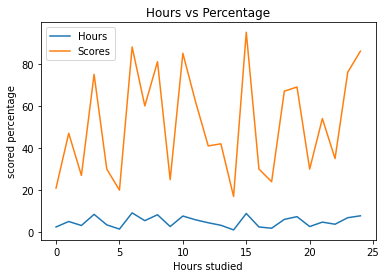

In [8]:
df.plot()
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('scored percentage')

plt.show() 

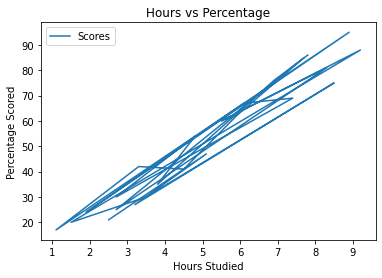

In [9]:
df.plot(x='Hours', y='Scores')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

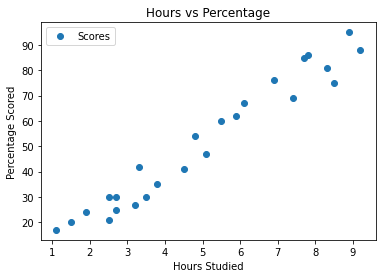

In [10]:

df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

# Intializing values to X and y

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [12]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Spliting Data

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Fitting Data

In [15]:
from sklearn.linear_model import LinearRegression  

regr =LinearRegression()  
regr.fit(X_train, y_train) 

LinearRegression()

# coefficients

In [16]:
regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.0181600414346974


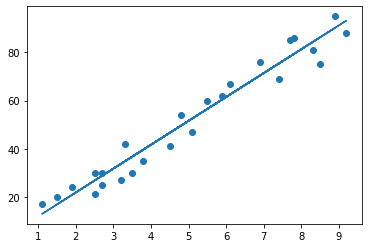

In [17]:
line = regr.coef_*X+regr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [18]:
print(X_test)
y_pred = regr.predict(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicted Score

In [20]:
hours = 9.25
hours=np.array([hours])
own_pred = regr.predict(hours.reshape(1,-1))
print("No of Hours = {}".format(hours))
print("Predicted percentage = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted percentage = 93.69173248737535


# If a student studies 9.25 hours then the student will get 93.69 percent

# Accuracy

In [21]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 4.18
Residual sum of squares (MSE): 21.60
R2-score: 0.95
